## Dados da ANTT



* Explorando

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATASETS/Acidentes_2010-2023_Tratada(1).csv')
df = pd.DataFrame(data)

In [ ]:
df['Sentido'] = df['Sentido'].replace({
    '0': 'Oeste',
    ' Norte': 'Norte'
})

In [ ]:
# Dividir a coluna 'Data e Hora' em 'Data' e 'Hora'
df[['Data', 'Horário']] = df['Data e Hora'].str.split(' ', 1, expand=True)

# Converter as colunas 'Data' e 'Hora' para datetime
df['Data'] = pd.to_datetime(df['Data'])
df['Horário'] = pd.to_datetime(df['Horário'], format='%H:%M:%S').dt.time

# Remover a coluna 'Data e Hora' original
df = df.drop(columns=['Data e Hora'])

# Reorganizar as colunas (mover 'Data' para a primeira posição)
cols = df.columns.tolist()
cols = ['Data'] + [col for col in cols if col != 'Data']  # Mover 'Data' para a primeira posição
df = df[cols]
# Reorganizar as colunas (mover 'Hora' para a segunda posição)
cols = df.columns.tolist()
cols = ['Horário'] + [col for col in cols if col != 'Horário']  # Mover 'Data' para a primeira posição
df = df[cols]

df


,Horário,Data,Concessionária da Rodovia,Trecho,Sentido,Km,Tipo de Acidente,Automovel,Bicicleta,Caminhao,...,Tracao Animal,Transporte de Cargas Especiais,Trator Maquinas,Utilitarios,Tipo de Ocorrencia,Ilesos,Levemente Feridos,Moderadamente Feridos,Gravemente Feridos,Mortos
0,04:21:00,2010-01-01,Rodovia do Aço,BR-393/RJ,Norte,167,Outros,1,0,0,...,0,0,0,0,Acidente sem Vítima,0,0,0,0,0
1,02:13:00,2010-01-01,Autopista Regis Bittencourt,BR-116/PR,Sul,270,Colisão Traseira,2,0,0,...,0,0,0,0,Acidente sem Vítima,0,0,0,0,0
2,03:35:00,2010-01-01,Concepa,BR-290/RS,Norte,77,Colisão Lateral no Mesmo Sentido,2,0,0,...,0,0,0,0,Acidente sem Vítima,0,0,0,0,0
3,07:31:00,2010-01-01,Concepa,BR-116/RS,Norte,52,Queda,0,0,0,...,0,0,0,0,Acidente sem Vítima,0,0,0,0,0
4,04:57:00,2010-01-01,Concepa,BR-290/RS,Norte,33,Queda,0,0,0,...,0,0,0,0,Acidente sem Vítima,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864556,00:08:00,2022-12-31,Concebra,BR-262/MG,Oeste,865,Saída de Pista,1,0,0,...,0,0,0,0,Acidente com Danos Materiais,0,0,0,0,0
864557,03:28:00,2022-12-31,ECO050,BR-50/MG,Decrescente,180,Capotamento,1,0,0,...,0,0,0,0,Acidente com Vítima,0,1,0,0,0
864558,05:05:55,2022-12-31,Autopista Planalto Sul,BR-116/PR,Decrescente,115,Colisão Traseira,2,0,0,...,0,0,0,0,Acidente sem Vítima,0,0,0,0,0
864559,13:49:33,2022-12-31,Concebra,BR-262/MG,Leste,379,Saída de Pista,0,0,0,...,0,0,0,0,Acidente com Danos Materiais,0,0,0,0,0


In [ ]:
df = df[~df['Data'].dt.year.isin([2023])]

 1-Tempo
* Quantidade de acidentes ao longo dos anos.
* Quantidade de acidentes ao longo do dia.
* Quantidade de acidentes ao longo do ano.
* Houve uma diminuição nos acidentes durante o período da pandemia?

In [ ]:
#Quantidade de acidentes ao longo dos anos.

In [ ]:
# Extrair o ano da coluna 'Data' e criar uma nova coluna 'Ano'
df['Ano'] = pd.to_datetime(df['Data']).dt.year

# Calcular o total de acidentes por ano e atribuir a uma nova coluna 'Total de Acidentes'
df['Total de Acidentes por Ano'] = df.groupby('Ano')['Data'].transform('count')

In [1]:
# Selecionar as colunas de interesse para o cálculo do total
colunas_interesse = ['Ilesos', 'Levemente Feridos', 'Moderadamente Feridos', 'Gravemente Feridos', 'Mortos']

# Calcular o total de acidentes em cada ano
total_acidentes_por_ano = df.groupby('Ano')[colunas_interesse].sum()

# Exibir o DataFrame com os totais
total_acidentes_por_ano

NameError: name 'df' is not defined

In [ ]:
#Horas de maior quantidade de acidentes

In [ ]:
# Converter a coluna 'Horário' para o tipo datetime
df['Horário'] = pd.to_datetime(df['Horário'], format='%H:%M:%S', errors='coerce')

# Extrair apenas a hora da coluna 'Horário'
df['Hora'] = df['Horário'].dt.hour

In [ ]:
#Mês de maior quantidade de acidentes.

In [ ]:
# Extrair o ano da coluna 'Data' e criar uma nova coluna 'Ano'
df['Mês'] = pd.to_datetime(df['Data']).dt.month

# Calcular o total de acidentes por ano e atribuir a uma nova coluna 'Total de Acidentes'
df['Total de Acidentes por Mês'] = df.groupby('Mês')['Data'].transform('count')

In [ ]:
contagem_por_ano = df['Total de Acidentes por Ano'].value_counts().sort_index().reset_index()
contagem_por_ano.columns = ['Ano', 'Total de Acidentes por Ano']
contagem_por_ano.set_index('Ano', inplace=True)  # Define o índice como 'Ano'
print(contagem_por_ano)


       Total de Acidentes por Ano
Ano                              
54837                       54837
56838                       56838
60455                       60455
60953                       60953
61090                       61090
62498                       62498
62632                       62632
63970                       63970
64853                       64853
67816                       67816
70104                       70104
70107                       70107
74458                       74458


In [ ]:
# Criar um DataFrame que mostra por ano o total de acidentes
tabela_total_acidentes = df.groupby('Ano')['Total de Acidentes por Ano'].max().reset_index()

# Renomear as colunas
tabela_total_acidentes.columns = ['Ano', 'Total de Acidentes']

# Define o índice como 'Ano'
tabela_total_acidentes.set_index('Ano', inplace=True)

# Exibir a tabela
print(tabela_total_acidentes)


      Total de Acidentes
Ano                     
2010               54837
2011               60455
2012               61090
2013               60953
2014               67816
2015               74458
2016               70104
2017               70107
2018               63970
2019               64853
2020               62632
2021               62498
2022               56838


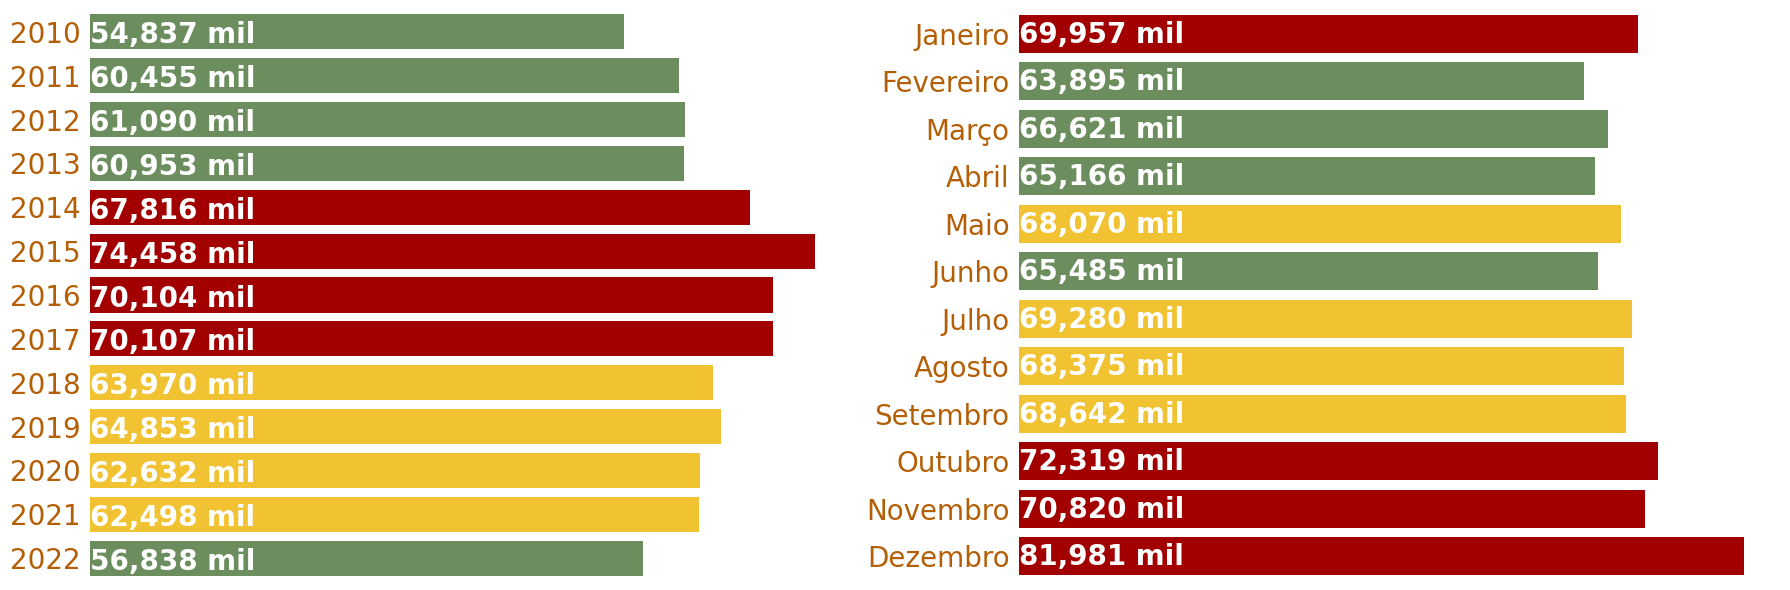

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define as paletas de cores para os gráficos
palette1 = '#a20000'  # Cor vermelha
palette2 = '#f1c232'  # Cor amarela
palette3 = '#699657'  # Cor verde

# Altere a cor dos valores do eixo Y
yticklabel_color = '#b45f06'

# Crie uma figura com subplots 1x2
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Primeiro subplot: Gráfico de barras horizontal para 'Ano'
ax1 = sns.barplot(x='Total de Acidentes por Ano', y='Ano', data=df, palette=[palette3] * len(df), capstyle='butt', orient='h', ax=axs[0])

tabela_total_acidentes = df.groupby('Ano')['Total de Acidentes por Ano'].max().reset_index()

# Renomear as colunas
tabela_total_acidentes.columns = ['Ano', 'Total de Acidentes por Ano']

# Destaque os três primeiros elementos em vermelho, os próximos três em amarelo e o restante em verde no subplot ax1 (Ano)
max_values_ax1 = tabela_total_acidentes['Total de Acidentes por Ano'].nlargest(4).index
next_values_ax1 = tabela_total_acidentes['Total de Acidentes por Ano'].nlargest(8).index.difference(max_values_ax1)
for i, bar in enumerate(ax1.patches):
    if i in max_values_ax1:
        bar.set_facecolor(palette1)
    elif i in next_values_ax1:
        bar.set_facecolor(palette2)

for i, bar in enumerate(ax1.patches):
    w = bar.get_width()
    ax1.text(
        0,
        i + bar.get_height() / 10,
        '{:,.0f} mil'.format(int(w)),
        ha='left',
        va='center',
        fontweight='bold',
        color='white',
        size=20,
    )

ax1.set(xticklabels=[])
ax1.tick_params(left=False, bottom=False)
ax1.tick_params(axis='x', which='both', bottom=False)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
sns.despine(left=True, right=True, top=True, bottom=True)
ax1.tick_params(axis='y', labelsize=20)  # Defina o tamanho da fonte dos rótulos do eixo Y
plt.yticks(rotation=0, fontsize=20)

# Segundo subplot: Gráfico de barras horizontal para 'Mês'
contagem_por_mes = df['Mês'].value_counts().sort_index().reset_index()
contagem_por_mes.columns = ['Mês', 'Total de Acidentes por Ano']

ax2 = sns.barplot(x='Total de Acidentes por Ano', y='Mês', data=contagem_por_mes, palette=[palette3] * len(contagem_por_mes), orient='h', ax=axs[1])

# Destaque as quatro barras com os maiores valores em vermelho, as próximas quatro em amarelo e o restante em verde no gráfico
max_values_ax2 = contagem_por_mes['Total de Acidentes por Ano'].nlargest(4).index
next_values_ax2 = contagem_por_mes['Total de Acidentes por Ano'].nlargest(8).index.difference(max_values_ax2)
for i, bar in enumerate(ax2.patches):
    if i in max_values_ax2:
        bar.set_facecolor(palette1)
    elif i in next_values_ax2:
        bar.set_facecolor(palette2)

for i, bar in enumerate(ax2.patches):
    w = bar.get_width()
    ax2.text(
        0,
        i + bar.get_height() / 48,
        '{:,.0f} mil'.format(int(w)),
        ha='left',
        va='center',
        fontweight='bold',
        color='white',
        size=20,
    )

# Defina os rótulos personalizados para o eixo Y (meses do ano)
meses_do_ano = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
ax2.set_yticks(range(len(meses_do_ano)))
ax2.set_yticklabels(meses_do_ano, fontsize=20)  # Defina o tamanho da fonte dos rótulos do eixo Y

ax2.set(ylabel=None)
ax2.set(xlabel=None)
ax2.tick_params(left=False, bottom=False, labelsize=20)  # Defina o tamanho da fonte dos rótulos do eixo Y
sns.despine(left=True, right=True, top=True, bottom=True)
ax2.set(xticklabels=[])

# Altere a cor dos valores do eixo Y para ambos os subplots
for label in ax1.get_yticklabels():
    label.set_color(yticklabel_color)

for label in ax2.get_yticklabels():
    label.set_color(yticklabel_color)

# Mostra os subplots
plt.tight_layout()
plt.show()


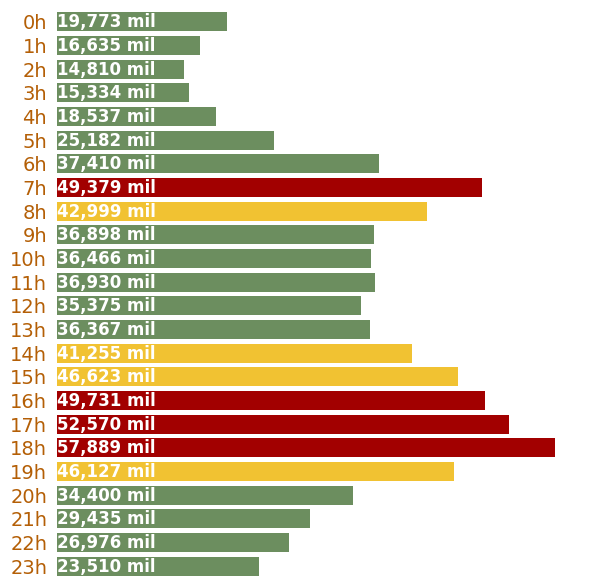

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define paleta de cores para os gráficos
palette1 = '#a20000'  # Cor vermelha
palette2 = '#f1c232'  # Cor amarela
palette3 = '#699657'  # Cor verde
yticklabel_color = '#b45f06'  # Cor para os valores no eixo Y

# Crie uma figura para o gráfico de barras horizontal para 'Hora'
plt.figure(figsize=(6, 6))

# Gráfico de barras horizontal para 'Hora'
contagem_por_hora = df['Hora'].value_counts().sort_index().reset_index()
contagem_por_hora.columns = ['Hora', 'Total de Acidentes por Ano']

ax3 = sns.barplot(x='Total de Acidentes por Ano', y='Hora', data=contagem_por_hora, palette=[palette3] * len(contagem_por_hora), orient='h')

# Destaque as quatro barras com os maiores valores em vermelho, as próximas quatro em amarelo e o restante em verde no gráfico
max_values_ax3 = contagem_por_hora['Total de Acidentes por Ano'].nlargest(4).index
next_values_ax3 = contagem_por_hora['Total de Acidentes por Ano'].nlargest(8).index.difference(max_values_ax3)
for i, bar in enumerate(ax3.patches):
    if i in max_values_ax3:
        bar.set_facecolor(palette1)
    elif i in next_values_ax3:
        bar.set_facecolor(palette2)

# Altere a cor dos rótulos no eixo Y (valores das barras) e adicione o "h" aos valores
yticklabels = ['{}h'.format(int(val)) for val in ax3.get_yticks()]
ax3.set_yticklabels(yticklabels, color=yticklabel_color)

for i, bar in enumerate(ax3.patches):
    w = bar.get_width()
    ax3.text(
        0,
        i + bar.get_height() / 48,
        '{:,.0f} mil'.format(int(w)),
        ha='left',
        va='center',
        fontweight='bold',
        color='white',
        size=12,
    )

ax3.tick_params(left=False, bottom=False)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
sns.despine(left=True, right=True, top=True, bottom=True)
ax3.set(xticklabels=[])  # Correção aqui
ax3.tick_params(axis='y', labelsize=14)  # Defina o tamanho da fonte dos rótulos do eixo Y

# Mostra o gráfico
plt.tight_layout()
plt.show()


2-Segurança
* Qual concessionária tem mais concessões de trechos?
* Os trechos com mais acidentes?
* Os trechos com menos acidentes?
* Em qual estado ocorre mais acidentes?
* Qual o sentido em que ocorreram mais acidentes?
* Qual o Km mais perigoso?

In [ ]:
#Qual rodovia com mais acidentes?

In [ ]:
#Os trechos com mais acidentes?

In [ ]:
# Calcula o Total de Vítimas como a soma das colunas especificadas
colunas_vitimas = [ 'Ilesos', 'Levemente Feridos', 'Moderadamente Feridos', 'Gravemente Feridos', 'Mortos']
df['Total de Vítimas'] = df[colunas_vitimas].sum(axis=1)

coluna_feridos = [ 'Levemente Feridos', 'Moderadamente Feridos', 'Gravemente Feridos']
df['Total de Feridos'] = df[coluna_feridos].sum(axis=1)


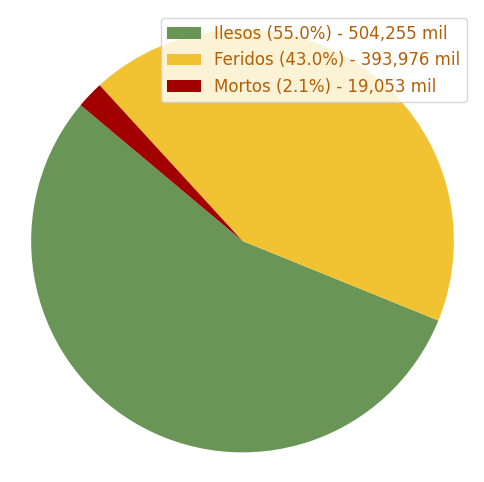

In [ ]:
import matplotlib.pyplot as plt
import locale

# Define a formatação de números com ponto como separador decimal e "mil" como separador de milhares
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Função para formatar números com ponto nas casas decimais e "mil" no final, sem o .0 no final de números inteiros
def format_number(number):
    formatted_number = locale.format_string('%.1f mil', number, grouping=True)
    return formatted_number.rstrip('.0').replace('.0 mil', ' mil')

# Dados para o gráfico de pizza
labels = ['Ilesos', 'Feridos', 'Mortos']  # Ordem modificada
sizes = [df['Ilesos'].sum(), df['Total de Feridos'].sum(), df['Mortos'].sum()]
colors = ['#699657', '#f1c232', '#a20000']  # Cores modificadas

# Calcula as porcentagens
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]

# Formata os tamanhos com "mil" no final e sem o .0 para números inteiros
formatted_sizes = [format_number(size) for size in sizes]

# Criação do gráfico de pizza
plt.figure(figsize=(6, 6))  # Tamanho da figura
_, _, autotexts = plt.pie(sizes, labels=['', '', ''], colors=colors, autopct='', startangle=140,
                          textprops={'color': 'white', 'fontsize': 12})  # Cria o gráfico e remove os rótulos

# Adicionar uma legenda personalizada com porcentagens e valores formatados
legend_labels = [f'{label} ({percentage:.1f}%) - {formatted}' for label, percentage, formatted in zip(labels, percentages, formatted_sizes)]

# Defina a localização da primeira legenda (com as porcentagens).
legend = plt.legend(legend_labels, loc='best', labels=legend_labels, prop={'size': 12})

# Altere a cor das letras da legenda para #b45f06
for text in legend.get_texts():
    text.set_color('#b45f06')

# Exibe o gráfico
plt.axis('equal')  # Proporção igual para que o gráfico seja um círculo
plt.show()


In [ ]:
print(f'Total de Mortos: {df["Mortos"].sum()}')
print(f'Total de Ilesos: {df["Ilesos"].sum()}')
print(f'Total de Feridos: {df["Total de Feridos"].sum()}')
print(f'Total de Vítimas: {df["Total de Vítimas"].sum()}')

Total de Mortos: 19053
Total de Ilesos: 504255
Total de Feridos: 393976
Total de Vítimas: 917284


In [ ]:
# Use a função split para dividir a coluna 'Trecho' em duas partes usando '/'
df['BRs'] = df['Trecho'].str.split('/').str[0]


In [ ]:
print(f"Total de BRs: {df['BRs'].value_counts().sum()}")
print(f"Total de Trechos: {df['Trecho'].value_counts().sum()}")


Total de BRs: 830611
Total de Trechos: 830611


In [ ]:
# Selecionar as colunas de interesse para o cálculo do total
colunas_interesse = ['Ilesos', 'Levemente Feridos', 'Moderadamente Feridos', 'Gravemente Feridos', 'Mortos']

# Calcular o total de acidentes em cada ano e por BRs
total_acidentes_por_ano_e_brs = df.groupby(['Ano', 'Trecho'])[colunas_interesse].sum()

# Exibir o DataFrame com os totais
total_acidentes_por_ano_e_brs


Ilesos  Levemente Feridos  \
Ano  Trecho                                                    
2010 Alça Sul                           3                  5   
     BR-040/MG                        111                173   
     BR-040/RJ                       1412               1036   
     BR-101/RJ                       3689               1139   
     BR-101/SC                       3125               1419   
...                                   ...                ...   
2022 CONTORNO NORTE - FS - 116/BA       0                  4   
     CONTORNO SUL  - FS/BA              0                 11   
     CW-116/SP                        109                  0   
     Contorno de Iconha/ES              8                  6   
     Contorno de Uberlândia/MG         31                 47   

                                   Moderadamente Feridos  Gravemente Feridos  \
Ano  Trecho                                                                    
2010 Alça Sul                                          0                   0   
     BR-040/MG                                        73                  14   
     BR-040/RJ                                       592                  74   
     BR-101/RJ                                       949                 223   
     BR-101/SC                                       405                 142   
...                                                  ...                 ...   
2022 CONTORNO NORTE - FS - 116/BA                      0                   1   
     CONTORNO SUL  - FS/BA                             3                   6   
     CW-116/SP                                         0                   5   
     Contorno de Iconha/ES                             7                   1   
     Contorno de Uberlândia/MG                        11                   7   

                                   Mortos  
Ano  Trecho                                
2010 Alça Sul                           1  
     BR-040/MG                         10  
     BR-040/RJ                         52  
     BR-101/RJ                        173  
     BR-101/SC                         97  
...                                   ...  
2022 CONTORNO NORTE - FS - 116/BA       0  
     CONTORNO SUL  - FS/BA              0  
     CW-116/SP                          1  
     Contorno de Iconha/ES              1  
     Contorno de Uberlândia/MG          0  

[584 rows x 5 columns]

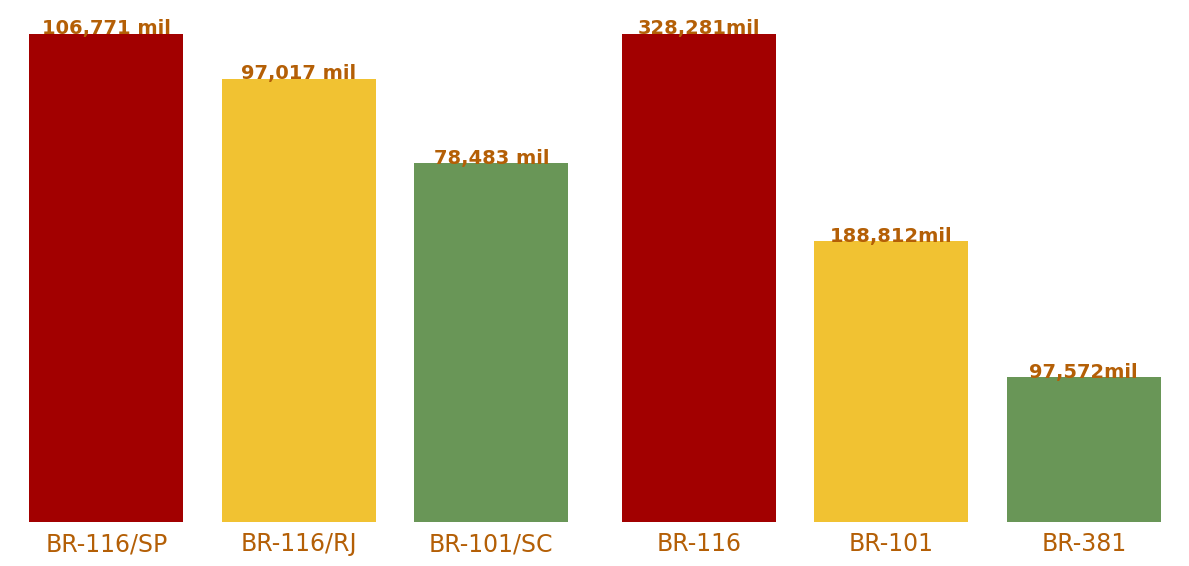

In [ ]:
#Total de Vítimas

# Define as paletas de cores
colors = ['#a20000', '#f1c232', '#699657']

# Agrupa os dados por 'Trecho' e calcula a soma de 'Total de Vítimas' para cada grupo
agrupado_trecho = df.groupby('Trecho')['Total de Vítimas'].sum().reset_index()

# Classifica o DataFrame pelo valor da coluna 'Total de Vítimas' em ordem decrescente
agrupado_trecho = agrupado_trecho.sort_values(by='Total de Vítimas', ascending=False)

# Seleciona os 6 primeiros trechos com mais vítimas
top_6_trechos_trecho = agrupado_trecho.head(3)

# Agrupa os dados por 'BRs' e calcula a soma de 'Total de Vítimas' para cada grupo
agrupado_brs = df.groupby('BRs')['Total de Vítimas'].sum().reset_index()

# Classifica o DataFrame pelo valor da coluna 'Total de Vítimas' em ordem decrescente
agrupado_brs = agrupado_brs.sort_values(by='Total de Vítimas', ascending=False)

# Seleciona os 6 primeiros trechos com mais vítimas
top_6_trechos_brs = agrupado_brs.head(3)

# Criação do gráfico de barras verticais
plt.figure(figsize=(12, 6))

# Primeiro subplot: Trecho
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
ax1 = sns.barplot(x='Trecho', y='Total de Vítimas', data=top_6_trechos_trecho, palette=colors, ci=None)
ax1.set_yticklabels([])

sns.despine(left=True, right=True, top=True, bottom=True)

for i, bar in enumerate(ax1.patches):
    if i < 1:
        bar.set_facecolor(colors[0])
    elif i < 2:
        bar.set_facecolor(colors[1])
    else:
        bar.set_facecolor(colors[2])

for i, bar in enumerate(ax1.patches):
    h = bar.get_height()
    ax1.text(
        i,
        h,  # Ajuste a posição vertical do rótulo
        '{:,.0f} mil'.format(int(h)),
        ha='center',
        fontweight='bold',
        color='#b45f06',
        size=14,
    )

ax1.set_xlabel('Trecho', fontsize=14)
ax1.set_ylabel('Total de Vítimas', fontsize=14)
ax1.tick_params(axis='x', labelrotation=0)
ax1.tick_params(axis='both', labelsize=17)
plt.tight_layout()
ax1.tick_params(left=False, bottom=False)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticklabels(ax1.get_xticklabels(), color='#b45f06')

# Segundo subplot: BRs
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
ax2 = sns.barplot(x='BRs', y='Total de Vítimas', data=top_6_trechos_brs, palette=colors, ci=None)
ax2.set_yticklabels([])

sns.despine(left=True, right=True, top=True, bottom=True)

for i, bar in enumerate(ax2.patches):
    if i < 1:
        bar.set_facecolor(colors[0])
    elif i < 2:
        bar.set_facecolor(colors[1])
    else:
        bar.set_facecolor(colors[2])

for i, bar in enumerate(ax2.patches):
    h = bar.get_height()
    ax2.text(
        i,
        h,  # Ajuste a posição vertical do rótulo
        '{:,.0f}mil'.format(int(h)),
        ha='center',
        fontweight='bold',
        color='#b45f06',
        size=14,
    )

ax2.set_xlabel('BRs', fontsize=12)
ax2.set_ylabel('')
ax2.tick_params(axis='x', labelrotation=0)
ax2.tick_params(axis='both', labelsize=17)
plt.tight_layout()
ax2.tick_params(left=False, bottom=False)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels(ax2.get_xticklabels(), color='#b45f06')
plt.show()




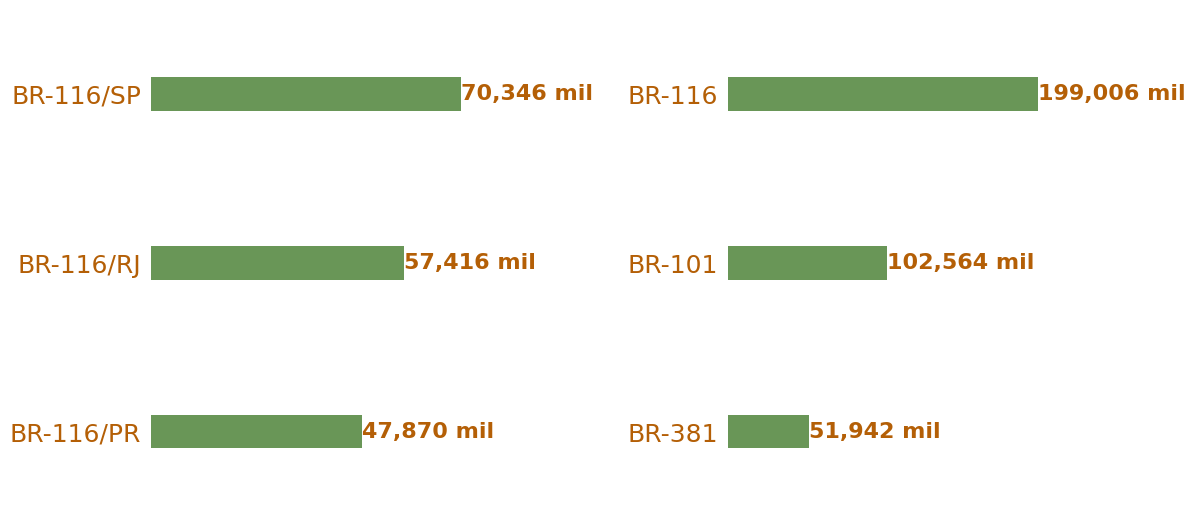

In [ ]:
#Total de Ilesos

# Define as paletas de cores
colors = ['#699657', '#699657', '#699657']

# Agrupa os dados por 'Trecho' e calcula a soma de 'Ilesos' para cada grupo
agrupado_trecho = df.groupby('Trecho')['Ilesos'].sum().reset_index()

# Classifica o DataFrame pelo valor da coluna 'Ilesos' em ordem decrescente
agrupado_trecho = agrupado_trecho.sort_values(by='Ilesos', ascending=False)

# Seleciona os 3 primeiros trechos com mais vítimas
top_3_trechos_trecho = agrupado_trecho.head(3)

# Agrupa os dados por 'BRs' e calcula a soma de 'Ilesos' para cada grupo
agrupado_brs = df.groupby('BRs')['Ilesos'].sum().reset_index()

# Classifica o DataFrame pelo valor da coluna 'Ilesos' em ordem decrescente
agrupado_brs = agrupado_brs.sort_values(by='Ilesos', ascending=False)

# Seleciona os 3 primeiros trechos com mais vítimas
top_3_trechos_brs = agrupado_brs.head(3)

# Criação do gráfico de barras horizontal
plt.figure(figsize=(12, 6))

# Primeiro subplot: Trecho
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
ax1 = sns.barplot(x='Ilesos', y='Trecho', data=top_3_trechos_trecho, palette=colors, ci=None, width = 0.2)

for i, bar in enumerate(ax1.patches):
    if i < 1:
        bar.set_facecolor(colors[0])
    elif i < 2:
        bar.set_facecolor(colors[1])
    else:
        bar.set_facecolor(colors[2])

for i, bar in enumerate(ax1.patches):
    w = bar.get_width()
    ax1.text(
        w,  # Ajuste a posição horizontal do rótulo
        i,  # Ajuste a posição vertical do rótulo
        '{:,.0f} mil'.format(int(w)),
        va='center',
        fontweight='bold',
        color='#b45f06',
        size=16,
    )

ax1.set_xlabel('Ilesos', fontsize=14)
ax1.set_ylabel('Trecho', fontsize=14)
ax1.tick_params(axis='y', labelrotation=0)
ax1.tick_params(axis='both', labelsize=18)
plt.tight_layout()
ax1.tick_params(left=False, bottom=False)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_yticklabels(ax1.get_yticklabels(), color='#b45f06')
ax1.set_xticklabels([])

# Segundo subplot: BRs
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
ax2 = sns.barplot(x='Ilesos', y='BRs', data=top_3_trechos_brs, palette=colors, ci=None, width = 0.2)

for i, bar in enumerate(ax2.patches):
    if i < 1:
        bar.set_facecolor(colors[0])
    elif i < 2:
        bar.set_facecolor(colors[1])
    else:
        bar.set_facecolor(colors[2])

for i, bar in enumerate(ax2.patches):
    w = bar.get_width()
    ax2.text(
        w,  # Ajuste a posição horizontal do rótulo
        i,  # Ajuste a posição vertical do rótulo
        '{:,.0f} mil'.format(int(w)),
        va='center',
        fontweight='bold',
        color='#b45f06',
        size=16,
    )

ax2.set_xlabel('Ilesos', fontsize=18)
ax2.set_ylabel('BRs', fontsize=14)
ax2.tick_params(axis='y', labelrotation=0)
ax2.tick_params(axis='both', labelsize=18)
plt.tight_layout()
ax2.tick_params(left=False, bottom=False)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_yticklabels(ax2.get_yticklabels(), color='#b45f06')
sns.despine(left=True, right=True, top=True, bottom=True)
ax2.set_xticklabels([])
plt.show()


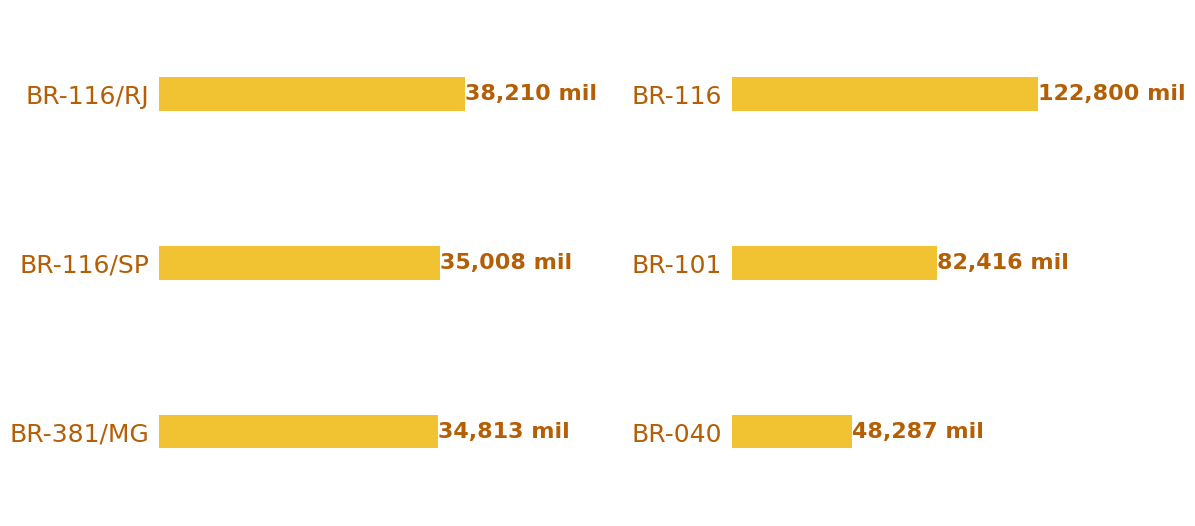

In [ ]:
#Total de Feridos

# Define as paletas de cores
colors = ['#f1c232', '#f1c232', '#f1c232']

# Agrupa os dados por 'Trecho' e calcula a soma de 'Ilesos' para cada grupo
agrupado_trecho = df.groupby('Trecho')['Total de Feridos'].sum().reset_index()

# Classifica o DataFrame pelo valor da coluna 'Ilesos' em ordem decrescente
agrupado_trecho = agrupado_trecho.sort_values(by='Total de Feridos', ascending=False)

# Seleciona os 3 primeiros trechos com mais vítimas
top_3_trechos_trecho = agrupado_trecho.head(3)

# Agrupa os dados por 'BRs' e calcula a soma de 'Ilesos' para cada grupo
agrupado_brs = df.groupby('BRs')['Total de Feridos'].sum().reset_index()

# Classifica o DataFrame pelo valor da coluna 'Ilesos' em ordem decrescente
agrupado_brs = agrupado_brs.sort_values(by='Total de Feridos', ascending=False)

# Seleciona os 3 primeiros trechos com mais vítimas
top_3_trechos_brs = agrupado_brs.head(3)

# Criação do gráfico de barras horizontal
plt.figure(figsize=(12, 6))

# Primeiro subplot: Trecho
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
ax1 = sns.barplot(x='Total de Feridos', y='Trecho', data=top_3_trechos_trecho, palette=colors, ci=None, width = 0.2)

for i, bar in enumerate(ax1.patches):
    if i < 1:
        bar.set_facecolor(colors[0])
    elif i < 2:
        bar.set_facecolor(colors[1])
    else:
        bar.set_facecolor(colors[2])

for i, bar in enumerate(ax1.patches):
    w = bar.get_width()
    ax1.text(
        w,  # Ajuste a posição horizontal do rótulo
        i,  # Ajuste a posição vertical do rótulo
        '{:,.0f} mil'.format(int(w)),
        va='center',
        fontweight='bold',
        color='#b45f06',
        size=16,
    )

ax1.set_xlabel('Total de Feridos', fontsize=14)
ax1.set_ylabel('Trecho', fontsize=14)
ax1.tick_params(axis='y', labelrotation=0)
ax1.tick_params(axis='both', labelsize=18)
plt.tight_layout()
ax1.tick_params(left=False, bottom=False)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_yticklabels(ax1.get_yticklabels(), color='#b45f06')
ax1.set_xticklabels([])

# Segundo subplot: BRs
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
ax2 = sns.barplot(x='Total de Feridos', y='BRs', data=top_3_trechos_brs, palette=colors, ci=None, width = 0.2)

for i, bar in enumerate(ax2.patches):
    if i < 1:
        bar.set_facecolor(colors[0])
    elif i < 2:
        bar.set_facecolor(colors[1])
    else:
        bar.set_facecolor(colors[2])

for i, bar in enumerate(ax2.patches):
    w = bar.get_width()
    ax2.text(
        w,  # Ajuste a posição horizontal do rótulo
        i,  # Ajuste a posição vertical do rótulo
        '{:,.0f} mil'.format(int(w)),
        va='center',
        fontweight='bold',
        color='#b45f06',
        size=16,
    )

ax2.set_xlabel('Total de Feridos', fontsize=18)
ax2.set_ylabel('BRs', fontsize=14)
ax2.tick_params(axis='y', labelrotation=0)
ax2.tick_params(axis='both', labelsize=18)
plt.tight_layout()
ax2.tick_params(left=False, bottom=False)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_yticklabels(ax2.get_yticklabels(), color='#b45f06')
sns.despine(left=True, right=True, top=True, bottom=True)
ax2.set_xticklabels([])
plt.show()


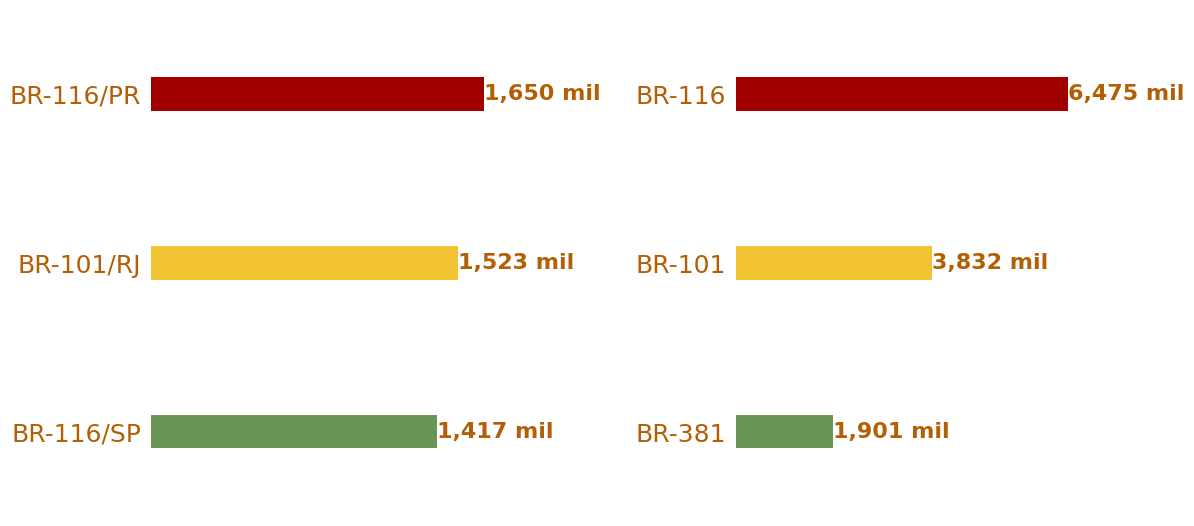

In [ ]:
#Total de Mortos

# Define as paletas de cores
colors = ['#a20000', '#f1c232', '#699657']

# Agrupa os dados por 'Trecho' e calcula a soma de 'Ilesos' para cada grupo
agrupado_trecho = df.groupby('Trecho')['Mortos'].sum().reset_index()

# Classifica o DataFrame pelo valor da coluna 'Ilesos' em ordem decrescente
agrupado_trecho = agrupado_trecho.sort_values(by='Mortos', ascending=False)

# Seleciona os 3 primeiros trechos com mais vítimas
top_3_trechos_trecho = agrupado_trecho.head(3)

# Agrupa os dados por 'BRs' e calcula a soma de 'Ilesos' para cada grupo
agrupado_brs = df.groupby('BRs')['Mortos'].sum().reset_index()

# Classifica o DataFrame pelo valor da coluna 'Ilesos' em ordem decrescente
agrupado_brs = agrupado_brs.sort_values(by='Mortos', ascending=False)

# Seleciona os 3 primeiros trechos com mais vítimas
top_3_trechos_brs = agrupado_brs.head(3)

# Criação do gráfico de barras horizontal
plt.figure(figsize=(12, 6))

# Primeiro subplot: Trecho
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
ax1 = sns.barplot(x='Mortos', y='Trecho', data=top_3_trechos_trecho, palette=colors, ci=None, width = 0.2)

for i, bar in enumerate(ax1.patches):
    if i < 1:
        bar.set_facecolor(colors[0])
    elif i < 2:
        bar.set_facecolor(colors[1])
    else:
        bar.set_facecolor(colors[2])

for i, bar in enumerate(ax1.patches):
    w = bar.get_width()
    ax1.text(
        w,  # Ajuste a posição horizontal do rótulo
        i,  # Ajuste a posição vertical do rótulo
        '{:,.0f} mil'.format(int(w)),
        va='center',
        fontweight='bold',
        color='#b45f06',
        size=16,
    )

ax1.set_xlabel('Mortos', fontsize=14)
ax1.set_ylabel('Trecho', fontsize=14)
ax1.tick_params(axis='y', labelrotation=0)
ax1.tick_params(axis='both', labelsize=18)
plt.tight_layout()
ax1.tick_params(left=False, bottom=False)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_yticklabels(ax1.get_yticklabels(), color='#b45f06')
ax1.set_xticklabels([])

# Segundo subplot: BRs
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
ax2 = sns.barplot(x='Mortos', y='BRs', data=top_3_trechos_brs, palette=colors, ci=None, width = 0.2)

for i, bar in enumerate(ax2.patches):
    if i < 1:
        bar.set_facecolor(colors[0])
    elif i < 2:
        bar.set_facecolor(colors[1])
    else:
        bar.set_facecolor(colors[2])

for i, bar in enumerate(ax2.patches):
    w = bar.get_width()
    ax2.text(
        w,  # Ajuste a posição horizontal do rótulo
        i,  # Ajuste a posição vertical do rótulo
        '{:,.0f} mil'.format(int(w)),
        va='center',
        fontweight='bold',
        color='#b45f06',
        size=16,
    )

ax2.set_xlabel('Mortos', fontsize=18)
ax2.set_ylabel('BRs', fontsize=14)
ax2.tick_params(axis='y', labelrotation=0)
ax2.tick_params(axis='both', labelsize=18)
plt.tight_layout()
ax2.tick_params(left=False, bottom=False)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_yticklabels(ax2.get_yticklabels(), color='#b45f06')
sns.despine(left=True, right=True, top=True, bottom=True)
ax2.set_xticklabels([])
plt.show()


In [ ]:
import pandas as pd
import re  # Importe o módulo 're' para trabalhar com expressões regulares



# Lista de siglas de estados do Brasil
siglas_estados = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']

# Função para extrair siglas de estados
def extrair_siglas(texto):
    siglas_encontradas = []
    for sigla in siglas_estados:
        # Use expressões regulares para verificar se a sigla está isolada por espaços ou hifens
        padrao = r'\b' + sigla + r'\b'
        if re.search(padrao, texto, re.IGNORECASE):
            siglas_encontradas.append(sigla)
    if siglas_encontradas:
        return ', '.join(siglas_encontradas)
    else:
        return 'Sem sigla'

# Aplicar a função à coluna 'Coluna'
df['Siglas'] = df['Trecho'].apply(extrair_siglas)

# Agrupar os dados pela coluna 'Siglas'
agrupado = df.groupby('Siglas')['Trecho'].apply(list).reset_index()

agrupado


,Siglas,Trecho
0,BA,"[BR-116/BA, BR-324/BA, BR-324/BA, BR-324/BA, B..."
1,DF,"[BR-040/DF, BR-060/DF, BR-040/DF, BR-060/DF, B..."
2,ES,"[BR-101/ES, BR-101/ES, BR-101/ES, BR-101/ES, B..."
3,GO,"[BR-060/GO, BR-040/GO, BR-040/GO, BR-040/GO, B..."
4,MG,"[BR-040/MG, BR-381/MG, BR-381/MG, BR-381/MG, B..."
5,MS,"[BR-163/MS, BR-163/MS, BR-163/MS, BR-163/MS, B..."
6,MT,"[BR-163/MT, BR-364/MT, BR-364/MT, BR-364/MT, B..."
7,PA,"[BR-163/PA, BR-230/PA, BR-163/PA, BR-163/PA, B..."
8,PR,"[BR-116/PR, BR-116/PR, BR-116/PR, BR-116/PR, B..."
9,RJ,"[BR-393/RJ, BR-040/RJ, BR-040/RJ, BR-040/RJ, B..."


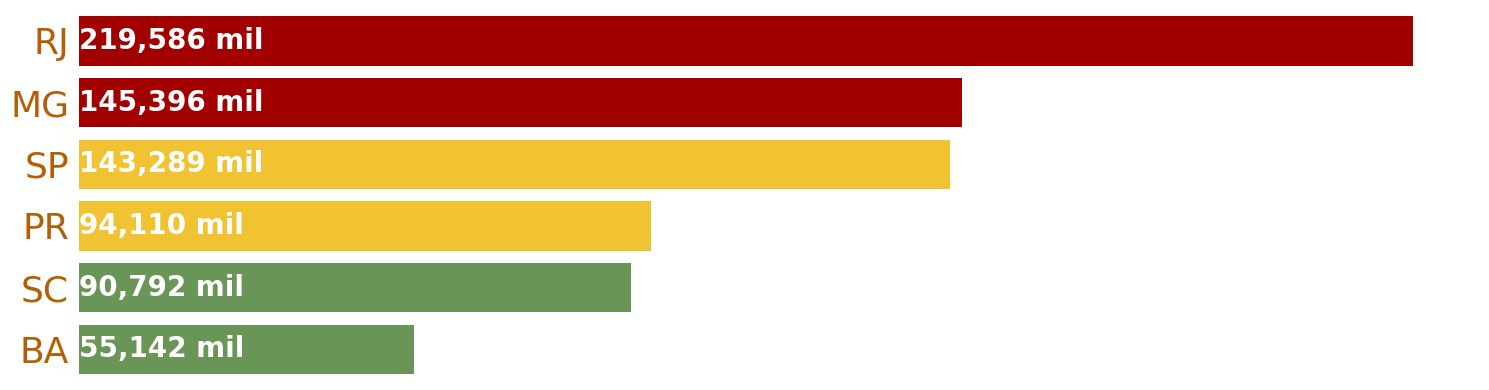

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a paleta de cores com as cores desejadas para cada grupo
colors = ['#a20000', '#a20000', '#f1c232', '#f1c232', '#699657', '#699657']

# Agrupa os dados por 'Siglas' e calcula a soma de 'Total de Vítimas' para cada estado
agrupado = df.groupby('Siglas')['Total de Vítimas'].sum().reset_index()

# Ordena o DataFrame por 'Total de Vítimas' em ordem decrescente
agrupado = agrupado.sort_values(by='Total de Vítimas', ascending=False)

# Seleciona os 6 primeiros estados
top_estados = agrupado.head(6)

# Criação do gráfico de barras
plt.figure(figsize=(15, 4))

ax = sns.barplot(x='Total de Vítimas', y='Siglas', data=top_estados, palette=colors, orient='h')

# Remova as bordas do gráfico
sns.despine(left=True, right=True, top=True, bottom=True)

# Defina as cores das barras manualmente
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(colors[i])

for bar in ax.patches:
    w = bar.get_width()
    ax.text(
        0,  # Ajuste a posição horizontal do rótulo
        bar.get_y() + bar.get_height() / 2,
        '{:,.0f} mil'.format(int(w)),
        ha='left',
        va='center',
        fontweight='bold',
        color='white',
        size=20,
    )

# Configure o título e os rótulos dos eixos
ax.set_ylabel('')

# Troque a cor dos valores do eixo Y
ax.tick_params(axis='y', labelsize=26, colors='#b45f06')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().get_xaxis().set_visible(False)
plt.tight_layout()
ax.tick_params(left=False, bottom=False)
plt.show()


In [ ]:
#Qual o Km mais perigoso?

In [ ]:
df.columns

Index(['Horário', 'Data', 'Concessionária da Rodovia', 'Trecho', 'Sentido',
       'Km', 'Tipo de Acidente', 'Automovel', 'Bicicleta', 'Caminhao', 'Moto',
       'Onibus', 'Outros', 'Tracao Animal', 'Transporte de Cargas Especiais',
       'Trator Maquinas', 'Utilitarios', 'Tipo de Ocorrencia', 'Ilesos',
       'Levemente Feridos', 'Moderadamente Feridos', 'Gravemente Feridos',
       'Mortos', 'Ano', 'Total de Acidentes por Ano', 'Hora', 'Mês',
       'Total de Acidentes por Mês', 'Total de Vítimas', 'Total de Feridos',
       'BRs', 'Siglas'],
      dtype='object')

In [ ]:
valores_km_br_116 = df[df['BRs'] == 'BR-116']['Km']

# Exibir os valores da coluna 'Km' associados a 'BR-116'
valores_unicos_contagem = valores_km_br_116.value_counts()

print(valores_unicos_contagem)

228    2454
226    2103
219    1931
230    1839
220    1828
       ... 
889       5
727       4
823       4
825       2
934       2
Name: Km, Length: 934, dtype: int64


In [ ]:
import pandas as pd

# Suponha que você tenha um DataFrame 'df' com as colunas 'BRs', 'Km' e 'Total de Vítimas'

# Filtrar o DataFrame para obter apenas as linhas com 'BRs' igual a 'BR-116'
df_br_116 = df[df['BRs'] == 'BR-116']

# Calcular a contagem de 'Total de Vítimas' por 'Km'
contagem_total_vitimas_por_km = df_br_116.groupby('Km')['Total de Vítimas'].sum()

# Exibir a associação entre 'Km' e 'Total de Vítimas'
print(contagem_total_vitimas_por_km)


Km
0      531
1      993
2      679
3      752
4      632
      ... 
930     28
931     16
932     13
933     19
934      0
Name: Total de Vítimas, Length: 934, dtype: int64


In [ ]:
import pandas as pd

# Suponha que você tenha um DataFrame 'df' com as colunas 'BRs' e 'Km'

# Filtrar o DataFrame para obter apenas as linhas com 'BRs' igual a 'BR-116'
df_br_116 = df[df['BRs'] == 'BR-116']

# Calcular a contagem de acidentes por quilômetro (Km)
contagem_acidentes_por_km = df_br_116['Km'].value_counts()

# Selecionar os 10 primeiros quilômetros com mais acidentes
top_10_km_com_acidentes = contagem_acidentes_por_km.nlargest(10)

# Exibir os 10 primeiros quilômetros com mais acidentes
print(top_10_km_com_acidentes)


228    2454
226    2103
219    1931
230    1839
220    1828
223    1811
224    1796
270    1756
222    1671
227    1635
Name: Km, dtype: int64


In [ ]:
import pandas as pd

# Suponha que você tenha um DataFrame 'df' com as colunas 'BRs', 'Km' e 'Tipos de Acidente'

# Filtrar o DataFrame para obter apenas as linhas com 'BRs' igual a 'BR-116'
df_br_116 = df[df['BRs'] == 'BR-116']

# Obter os 10 maiores valores únicos de contagem de 'Km'
top_10_km = valores_unicos_contagem.head(10).index

# Filtrar o DataFrame para incluir apenas as linhas com 'Km' nos top 10 valores únicos
df_top_10_km = df_br_116[df_br_116['Km'].isin(top_10_km)]

# Criar um dicionário para armazenar o tipo de acidente mais comum em cada 'Km'
tipo_acidente_mais_comum_por_km = {}

# Iterar pelos valores únicos de 'Km'
for km in top_10_km:
    # Filtrar o DataFrame para o valor específico de 'Km'
    df_km = df_top_10_km[df_top_10_km['Km'] == km]

    # Calcular a contagem de tipos de acidente
    contagem_tipos_acidente = df_km['Tipo de Acidente'].value_counts()

    # Obter o tipo de acidente mais comum
    tipo_acidente_mais_comum = contagem_tipos_acidente.idxmax()

    # Armazenar o resultado no dicionário
    tipo_acidente_mais_comum_por_km[km] = tipo_acidente_mais_comum

# Exibir o tipo de acidente mais comum em cada 'Km'
for km, tipo_acidente in tipo_acidente_mais_comum_por_km.items():
    print(f"Km {km}: Tipo de acidente mais comum: {tipo_acidente}")


Km 228: Tipo de acidente mais comum: Colisão com Obstáculos
Km 226: Tipo de acidente mais comum: Colisão com Obstáculos
Km 219: Tipo de acidente mais comum: Colisão Traseira
Km 230: Tipo de acidente mais comum: Colisão Traseira
Km 220: Tipo de acidente mais comum: Colisão Traseira
Km 223: Tipo de acidente mais comum: Colisão Traseira
Km 224: Tipo de acidente mais comum: Colisão Traseira
Km 270: Tipo de acidente mais comum: Colisão Traseira
Km 222: Tipo de acidente mais comum: Colisão Traseira
Km 227: Tipo de acidente mais comum: Colisão Traseira


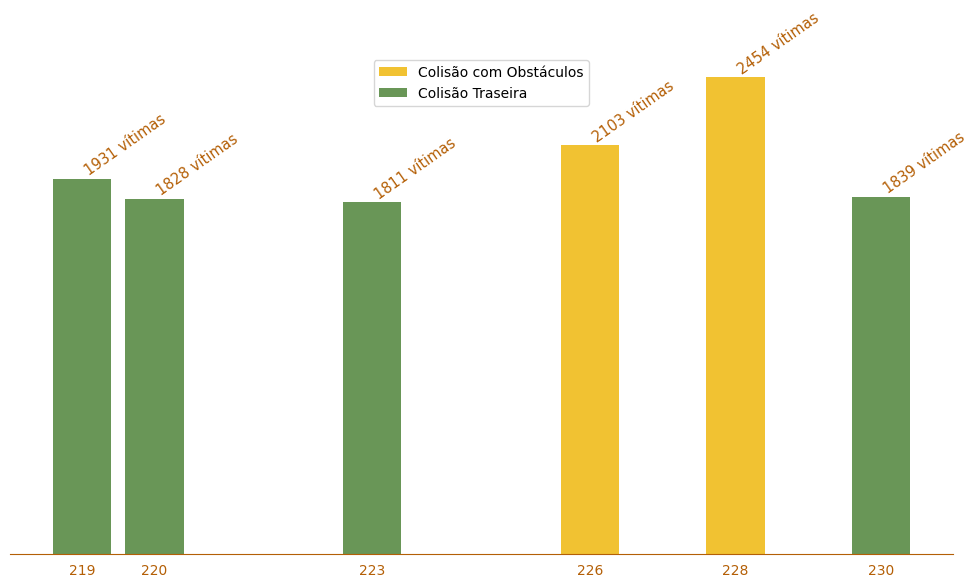

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

color = '#699657'
color1 = '#f1c232'

# Dados
dados_km_tipo_acidente = [
    (228, ['Colisão com Obstáculos'], 2454),
    (226, ['Colisão com Obstáculos'], 2103),
    (219, ['Colisão Traseira'], 1931),
    (230, ['Colisão Traseira'], 1839),
    (220, ['Colisão Traseira'], 1828),
    (223, ['Colisão Traseira'], 1811),

]

# Preparar os dados
quilometros = [dados[0] for dados in dados_km_tipo_acidente]
tipos_acidente = [dados[1][0] for dados in dados_km_tipo_acidente]  # Extrair o tipo de acidente
contagens = [dados[2] for dados in dados_km_tipo_acidente]

# Cores para os tipos de acidente
cores_tipo_acidente = {
    'Colisão com Obstáculos': color1,
    'Colisão Traseira': color,
    # Adicione mais cores para outros tipos de acidente, se necessário
}

# Criar um DataFrame para facilitar a plotagem
dkta = pd.DataFrame({'Km': quilometros, 'Tipo de Acidente': tipos_acidente, 'Contagem': contagens})

# Criar um dicionário para armazenar as contagens por tipo de acidente
contagens_por_tipo = {}
for tipo_acidente, cor in cores_tipo_acidente.items():
    contagem = dkta[dkta['Tipo de Acidente'] == tipo_acidente]
    contagens_por_tipo[tipo_acidente] = contagem

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))

for tipo_acidente, cor in cores_tipo_acidente.items():
    bars = plt.bar(contagens_por_tipo[tipo_acidente]['Km'], contagens_por_tipo[tipo_acidente]['Contagem'], color=cor, label=tipo_acidente)

    # Adicionar valores das barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                 f'{height} vítimas',
                 ha='left', va='bottom', fontsize=10.5, color='#b45f06', rotation= 35)

plt.xticks(quilometros)
plt.yticks([])
plt.legend(loc='upper center')
plt.grid(False)
plt.tick_params(colors='#b45f06')
plt.tick_params(left=False, bottom=False)
sns.despine(left=True, right=True, top=True, bottom=False)
plt.gca().spines['bottom'].set_color('#b45f06')


# Exibir o gráfico
plt.tight_layout()
plt.show()


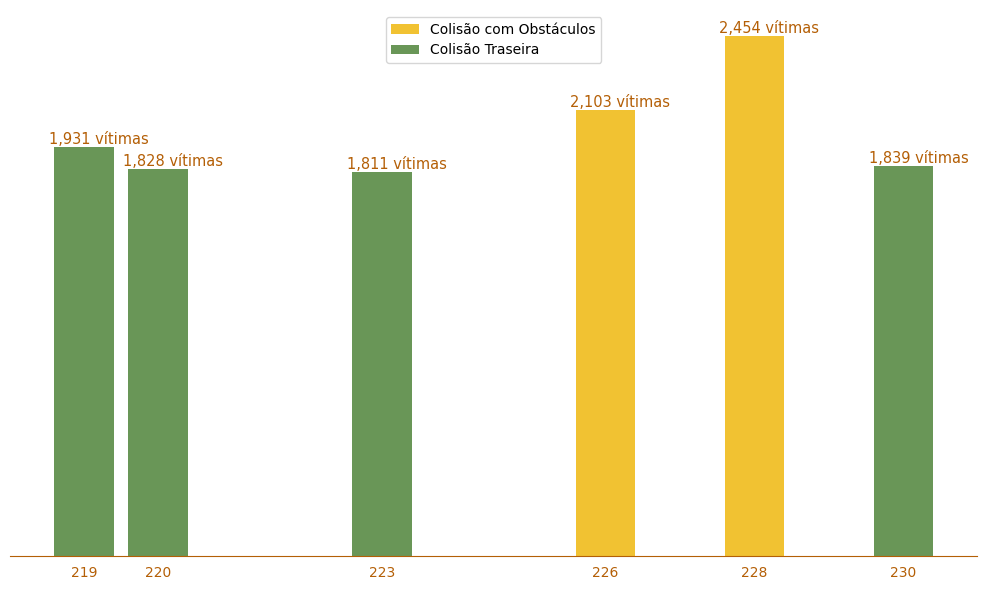

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale

color = '#699657'
color1 = '#f1c232'

# Dados
dados_km_tipo_acidente = [
    (228, ['Colisão com Obstáculos'], 2454),
    (226, ['Colisão com Obstáculos'], 2103),
    (219, ['Colisão Traseira'], 1931),
    (230, ['Colisão Traseira'], 1839),
    (220, ['Colisão Traseira'], 1828),
    (223, ['Colisão Traseira'], 1811),
]

# Preparar os dados
quilometros = [dados[0] for dados in dados_km_tipo_acidente]
tipos_acidente = [dados[1][0] for dados in dados_km_tipo_acidente]  # Extrair o tipo de acidente
contagens = [dados[2] for dados in dados_km_tipo_acidente]

# Cores para os tipos de acidente
cores_tipo_acidente = {
    'Colisão com Obstáculos': color1,
    'Colisão Traseira': color,
    # Adicione mais cores para outros tipos de acidente, se necessário
}

# Criar um DataFrame para facilitar a plotagem
dkta = pd.DataFrame({'Km': quilometros, 'Tipo de Acidente': tipos_acidente, 'Contagem': contagens})

# Criar um dicionário para armazenar as contagens por tipo de acidente
contagens_por_tipo = {}
for tipo_acidente, cor in cores_tipo_acidente.items():
    contagem = dkta[dkta['Tipo de Acidente'] == tipo_acidente]
    contagens_por_tipo[tipo_acidente] = contagem

# Configurar a localização para formatar números com vírgula como separador de milhar
locale.setlocale(locale.LC_ALL, '')

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))

for tipo_acidente, cor in cores_tipo_acidente.items():
    bars = plt.bar(contagens_por_tipo[tipo_acidente]['Km'], contagens_por_tipo[tipo_acidente]['Contagem'], color=cor, label=tipo_acidente)

    # Adicionar valores das barras com vírgula como separador de milhar
    for bar in bars:
        height = bar.get_height()
        v_formatado = locale.format_string('%d', height, grouping=True)
        plt.text(bar.get_x() + bar.get_width() / 2 + 0.2, height,
                 f'{v_formatado} vítimas',
                 ha='center', va='bottom', fontsize=10.5, color='#b45f06', rotation=0)

plt.xticks(quilometros)
plt.yticks([])
plt.legend(loc='upper center')
plt.grid(False)
plt.tick_params(colors='#b45f06')
plt.tick_params(left=False, bottom=False)
sns.despine(left=True, right=True, top=True, bottom=False)
plt.gca().spines['bottom'].set_color('#b45f06')

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [ ]:

# Ordene o DataFrame pelo número de vítimas em ordem decrescente
df = df.sort_values(by='Total de Vítimas', ascending=False)

# Selecione os 10 primeiros quilômetros com mais vítimas
top_10_km = df.head(10)

# Exiba os 10 primeiros quilômetros com mais vítimas
print(top_10_km[['Km', 'Total de Vítimas']])

         Km  Total de Vítimas
691208  211               178
66999   618               175
703993  116               151
467776  512               150
483126  313               120
281500  165               119
486230  169               112
97189   169               110
784104  211               108
691244  172               106


In [ ]:
# Calcular a contagem de 'Total de Vítimas' por 'Km'
contagem_total_vitimas_por_km = df.groupby('Km')['Total de Vítimas'].sum()

# Exibir a associação entre 'Km' e 'Total de Vítimas'
print(contagem_total_vitimas_por_km)


Km
0       1899
1       3269
2       3371
3       2592
4       2608
        ... 
1114       1
1115       3
1124       1
1126       0
1128       0
Name: Total de Vítimas, Length: 988, dtype: int64


In [ ]:
# Crie faixas de 50 Km
faixa_de_km = pd.cut(df['Km'], bins=range(0, df['Km'].max() + 51, 50), right=False)

# Adicione a coluna 'Faixa de Km' ao DataFrame
df['Faixa de Km'] = faixa_de_km

# Agrupe os dados por faixa de Km e some as vítimas em cada faixa
total_vitimas_por_faixa = df.groupby('Faixa de Km')['Total de Vítimas'].sum()

# Exiba o total de vítimas em cada faixa de 50 Km
print(total_vitimas_por_faixa)

Faixa de Km
[0, 50)          90113
[50, 100)       111180
[100, 150)      124362
[150, 200)       89184
[200, 250)       99750
[250, 300)       77200
[300, 350)       45280
[350, 400)       15753
[400, 450)       17195
[450, 500)       39139
[500, 550)       56050
[550, 600)       31535
[600, 650)       32792
[650, 700)       24811
[700, 750)       12574
[750, 800)       13813
[800, 850)       18694
[850, 900)        7274
[900, 950)       10335
[950, 1000)        221
[1000, 1050)        13
[1050, 1100)         4
[1100, 1150)        12
Name: Total de Vítimas, dtype: int64


In [ ]:
# Agrupar o DataFrame por 'BR' e calcular a soma de 'Total de Vítimas' em cada grupo
victims_by_br = df.groupby('BRs')['Total de Vítimas'].sum()

# Classificar os grupos em ordem decrescente com base na contagem de vítimas
victims_by_br = victims_by_br.sort_values(ascending=False)

# Mostrar os valores com mais vítimas
print(victims_by_br.head())


BRs
BR-116    328281
BR-101    188812
BR-381     97572
BR-040     87407
BR-153     32958
Name: Total de Vítimas, dtype: int64


In [ ]:
# Lista das BRs desejadas
brs_desejadas = ['BR-116', 'BR-101', 'BR-381', 'BR-040', 'BR-153']

# Filtrar o DataFrame para incluir apenas as BRs desejadas
filtro_brs = df[df['BRs'].isin(brs_desejadas)]

# Calcular a soma de 'Total de Vítimas' para cada BR
soma_vitimas_por_br = filtro_brs.groupby('BRs')['Total de Vítimas'].sum()

# Mostrar a soma de vítimas para cada BR
print(soma_vitimas_por_br)


BRs
BR-040     87407
BR-101    188812
BR-116    328281
BR-153     32958
BR-381     97572
Name: Total de Vítimas, dtype: int64


In [ ]:
import pandas as pd

# Suponha que você já tenha carregado seu DataFrame 'df' com os dados

# Lista das BRs desejadas
brs_desejadas = ['BR-040', 'BR-101', 'BR-116', 'BR-153', 'BR-381']

# Inicializar um dicionário para armazenar os resultados
resultados = {}

# Filtrar o DataFrame para incluir apenas as BRs desejadas
filtro_brs = df[df['BRs'].isin(brs_desejadas)]

# Calcular a moda e a contagem da moda para cada BR
for br in brs_desejadas:
    filtro_br = filtro_brs[filtro_brs['BRs'] == br]
    moda_km = filtro_br['Km'].mode()
    contagem_moda = filtro_br['Km'].value_counts().get(moda_km[0], 0)
    resultados[br] = {'Moda': moda_km[0], 'Contagem da Moda': contagem_moda}

# Exibir os resultados
for br, info in resultados.items():
    print(f'BR-{br}:')
    print(f'Moda: {info["Moda"]} Km')
    print(f'Contagem da Moda: {info["Contagem da Moda"]}')


BR-BR-040:
Moda: 93 Km
Contagem da Moda: 1830
BR-BR-101:
Moda: 206 Km
Contagem da Moda: 2033
BR-BR-116:
Moda: 228 Km
Contagem da Moda: 2454
BR-BR-153:
Moda: 62 Km
Contagem da Moda: 915
BR-BR-381:
Moda: 484 Km
Contagem da Moda: 1492


<Figure size 1000x600 with 0 Axes>

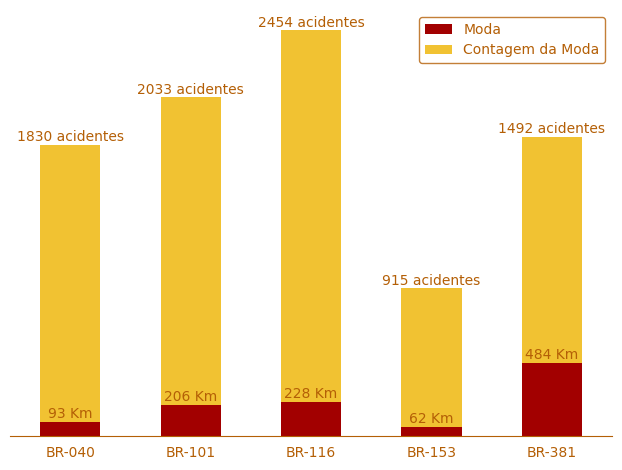

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponha que você já tenha carregado seu DataFrame 'df' com os dados

# Lista das BRs desejadas
brs_desejadas = ['BR-040', 'BR-101', 'BR-116', 'BR-153', 'BR-381']

# Inicializar um dicionário para armazenar os resultados
resultados = {'BR': [], 'Moda': [], 'Contagem da Moda': []}

# Filtrar o DataFrame para incluir apenas as BRs desejadas
filtro_brs = df[df['BRs'].isin(brs_desejadas)]

# Calcular a moda e a contagem da moda para cada BR
for br in brs_desejadas:
    filtro_br = filtro_brs[filtro_brs['BRs'] == br]
    moda_km = filtro_br['Km'].mode()
    contagem_moda = filtro_br['Km'].value_counts().get(moda_km[0], 0)
    resultados['BR'].append(f'{br}')
    resultados['Moda'].append(moda_km[0])
    resultados['Contagem da Moda'].append(contagem_moda)

# Criar um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Criar uma paleta de cores personalizada
colors = ['#a20000', '#f1c232']

# Criar um gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
sns.set_palette(colors)
ax = df_resultados.plot(x='BR', kind='bar', stacked=True)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores acima das barras com a cor '#b45f06' e "acidentes" ao lado da Contagem da Moda
for i, row in df_resultados.iterrows():
    plt.text(i, row['Moda'] + 5, str(row['Moda']) + ' Km', ha='center', va='bottom', color='#b45f06', fontsize=10)
    plt.text(i, row['Moda'] + row['Contagem da Moda'] + 5, str(row['Contagem da Moda']) + ' acidentes', ha='center', va='bottom', color='#b45f06', fontsize=10)

sns.despine(left=True, right=True, top=True, bottom=False)
plt.gca().spines['bottom'].set_color('#b45f06')
plt.yticks([])
plt.tick_params(colors='#b45f06')
plt.tick_params(left=False, bottom=False)
plt.xlabel('')
# Exibir o gráfico com a cor da fonte e da moldura da legenda alteradas
plt.legend(labels=df_resultados.columns[1:], loc='upper right', frameon=True, edgecolor='#b45f06')
legend = plt.gca().get_legend()
for text in legend.get_texts():
    text.set_color('#b45f06')

# Exibir o gráfico
plt.tight_layout()
plt.show()


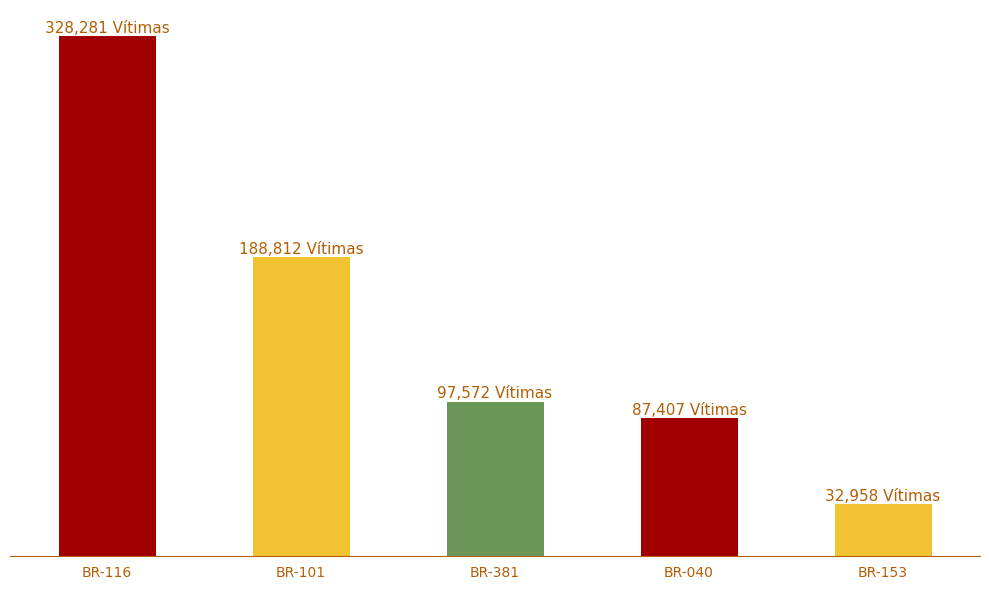

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista das BRs desejadas
brs_desejadas = ['BR-116', 'BR-101', 'BR-381', 'BR-040', 'BR-153']

# Filtrar o DataFrame para incluir apenas as BRs desejadas
filtro_brs = df[df['BRs'].isin(brs_desejadas)]

# Calcular a soma de 'Total de Vítimas' para cada BR
soma_vitimas_por_br = filtro_brs.groupby('BRs')['Total de Vítimas'].sum()

# Ordenar em ordem decrescente
soma_vitimas_por_br = soma_vitimas_por_br.sort_values(ascending=False)

# Cores para as barras
cores = ['#a20000', '#f1c232', '#699657']

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
ax = soma_vitimas_por_br.plot(kind='bar', color=cores)
plt.yticks([])
sns.despine(left=True, right=True, top=True, bottom=False)
plt.xticks(rotation=0)
plt.grid(False)
plt.tick_params(left=False, bottom=False)
plt.tick_params(colors='#b45f06')

# Adicionar valores acima das barras com vírgula como separador de milhar e a palavra "Vítimas"
for i, v in enumerate(soma_vitimas_por_br):
    v_formatado = '{:,}'.format(v)  # Formata o número com vírgula como separador de milhar
    ax.text(i, v + 100, f'{v_formatado} Vítimas', ha='center', va='bottom', color='#b45f06', fontsize=11)

# Remover o rótulo do eixo x
plt.xlabel('')
ax.spines['bottom'].set_color('#b45f06')
# Exibir o gráfico
plt.tight_layout()
plt.show()


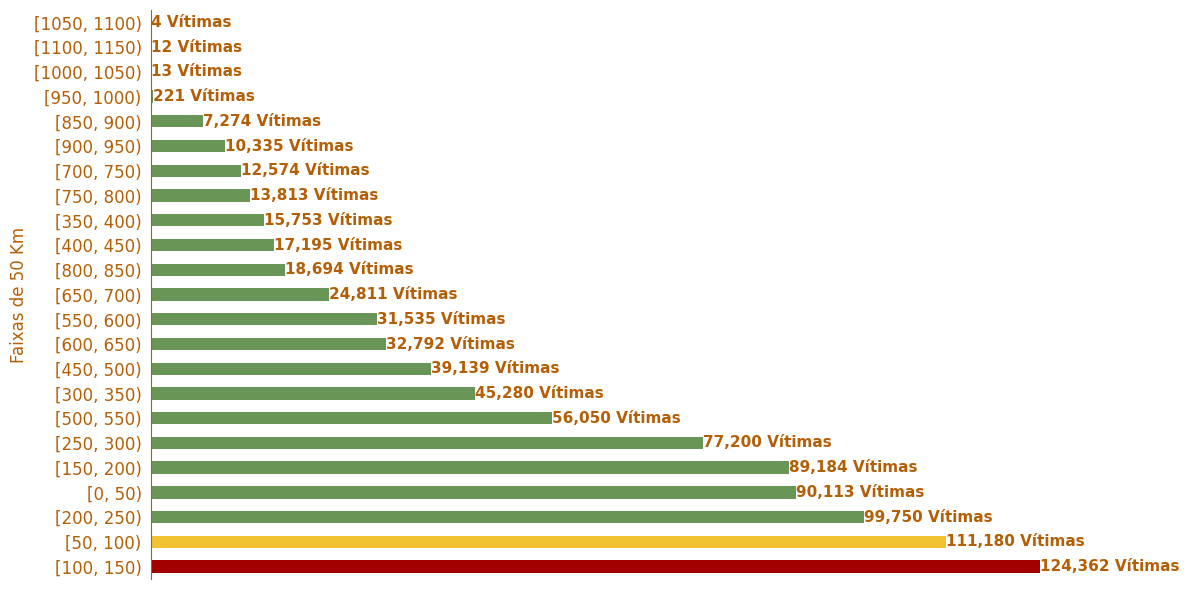

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
# Suponha que você tenha um DataFrame 'df' com as colunas 'Km' e 'Total de Vítimas'

# Calcular a contagem de 'Total de Vítimas' por 'Km'
contagem_total_vitimas_por_km = df.groupby('Faixa de Km')['Total de Vítimas'].sum()

# Ordenar a contagem em ordem decrescente
contagem_total_vitimas_por_km = contagem_total_vitimas_por_km.sort_values(ascending=False)

# Definir as cores para as barras
colors = ['#a20000', '#f1c232', '#699657']

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
ax = contagem_total_vitimas_por_km.plot(kind='barh', color='#699657')

plt.grid(False)
plt.xticks([])

# Adicionar rótulos às barras com a palavra "Vítimas" e vírgula como separador de milhar
for i, v in enumerate(contagem_total_vitimas_por_km):
    v_formatado = locale.format_string('%d', v, grouping=True)  # Formata o número com vírgula como separador de milhar
    ax.text(v, i, f'{v_formatado} Vítimas', ha='left', va='center', color='#b45f06', fontsize=11, fontweight='bold')

# Colorir as três primeiras barras com as cores especificadas
for i, bar in enumerate(ax.patches):
    if i < 3:
        bar.set_facecolor(colors[i])



plt.tick_params(left=False, bottom=False)
sns.despine(left=False, right=True, top=True, bottom=True)
plt.gca().spines['left'].set_color('#b45f06')
plt.tick_params(colors='#b45f06')
plt.yticks(fontsize=12)
plt.ylabel('Faixas de 50 Km', color='#b45f06', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


3-Véiculos
* Qual o véiculo mais envolvido em acidentes?
* Qual o tipo de acidente mais comum?

In [ ]:
#Qual o véiculo mais envolvido em acidentes?

In [ ]:
df.columns

Index(['Horário', 'Data', 'Concessionária da Rodovia', 'Trecho', 'Sentido',
       'Km', 'Tipo de Acidente', 'Automovel', 'Bicicleta', 'Caminhao', 'Moto',
       'Onibus', 'Outros', 'Tracao Animal', 'Transporte de Cargas Especiais',
       'Trator Maquinas', 'Utilitarios', 'Tipo de Ocorrencia', 'Ilesos',
       'Levemente Feridos', 'Moderadamente Feridos', 'Gravemente Feridos',
       'Mortos', 'Ano', 'Total de Acidentes por Ano', 'Hora', 'Mês',
       'Total de Acidentes por Mês', 'Total de Vítimas', 'Total de Feridos',
       'BRs', 'Siglas', 'Faixa de Km'],
      dtype='object')

In [ ]:
automovel = df['Automovel'].groupby(df['Total de Vítimas']).sum().sum()
bicicleta =df['Bicicleta'].groupby(df['Total de Vítimas']).sum().sum()
caminhao = df['Caminhao'].groupby(df['Total de Vítimas']).sum().sum()
moto = df['Moto'].groupby(df['Total de Vítimas']).sum().sum()
onibus = df['Onibus'].groupby(df['Total de Vítimas']).sum().sum()
outros = df['Outros'].groupby(df['Total de Vítimas']).sum().sum()
transporte_de_cargas_especiais = df['Transporte de Cargas Especiais'].groupby(df['Total de Vítimas']).sum().sum()
trator_maquinas = df['Trator Maquinas'].groupby(df['Total de Vítimas']).sum().sum()
utilitarios = df['Utilitarios'].groupby(df['Total de Vítimas']).sum().sum()

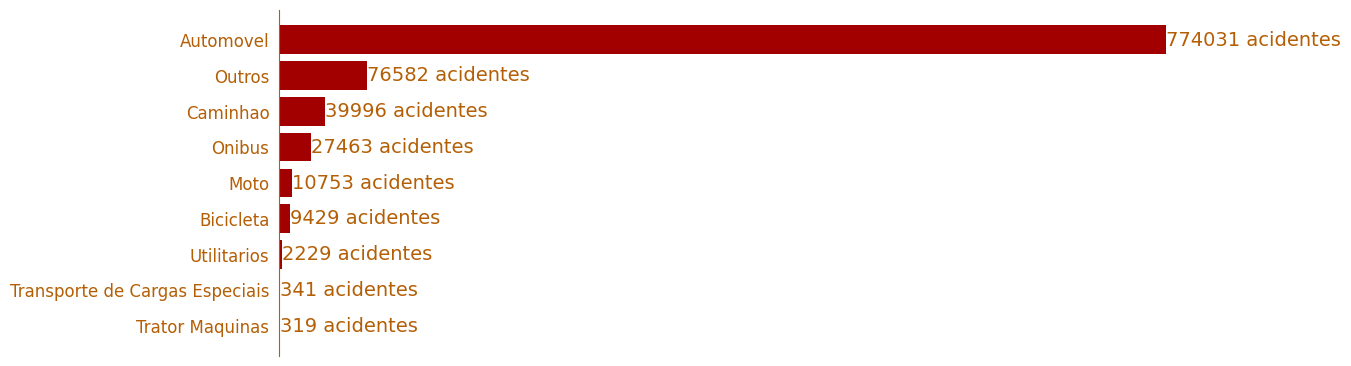

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defina os tipos de veículos e totais
tipos_de_veiculos = ['Automovel', 'Bicicleta', 'Caminhao', 'Moto', 'Onibus', 'Outros', 'Transporte de Cargas Especiais', 'Trator Maquinas', 'Utilitarios']
totais = [automovel, bicicleta, caminhao, moto, onibus, outros, transporte_de_cargas_especiais, trator_maquinas, utilitarios]

# Ordene os tipos de veículos e totais em ordem decrescente
tipos_de_veiculos, totais = zip(*sorted(zip(tipos_de_veiculos, totais), key=lambda x: x[1], reverse=False))

# Crie um gráfico de barras na horizontal para visualizar os totais
plt.figure(figsize=(12, 4))
plt.barh(tipos_de_veiculos, totais, color='#a20000')  # Altere a cor das barras

plt.tight_layout()

# Adicione os valores à direita de cada barra com tamanho de fonte e cor personalizados, incluindo "acidentes"
for i, total in enumerate(totais):
    plt.annotate(f'{total} acidentes', (total, tipos_de_veiculos[i]), va='center', fontsize=14, color='#b45f06')  # Altere o tamanho da fonte e a cor

plt.tick_params(left=False, bottom=False)
sns.despine(left=False, right=True, top=True, bottom=True)
plt.gca().spines['left'].set_color('#b45f06')
plt.tick_params(colors='#b45f06')
plt.ylabel('')
plt.xticks([])
plt.yticks(fontsize=12)
# Exiba o gráfico
plt.show()


In [ ]:
#Quantidade de vítimas por tipo de acidente?

In [ ]:
df['Tipo de Acidente'].unique()

array(['Colisão com Obstáculos', 'Colisão Traseira',
       'Colisão Lateral no Mesmo Sentido', 'Atropelamento de Pedestre',
       'Colisão Transversal', 'Atrpelamento Ciclista', 'Outros',
       'Tombamento', 'Colisão Frontal', 'Atropelamento de Animal',
       'Queda', 'Colisão Lateral em Sentido Contrário', 'Saída de Pista',
       'Incêndio ou Explosão', 'Capotamento', 'Atropelamento de Ciclista',
       nan, 'Atropelamento Outros'], dtype=object)

In [ ]:
df['Tipo de Acidente'] = df['Tipo de Acidente'].replace({
    'Atrpelamento Ciclista': 'Atropelamento Ciclista',
    'Atropelamento de Ciclista': 'Atropelamento Ciclista'
})

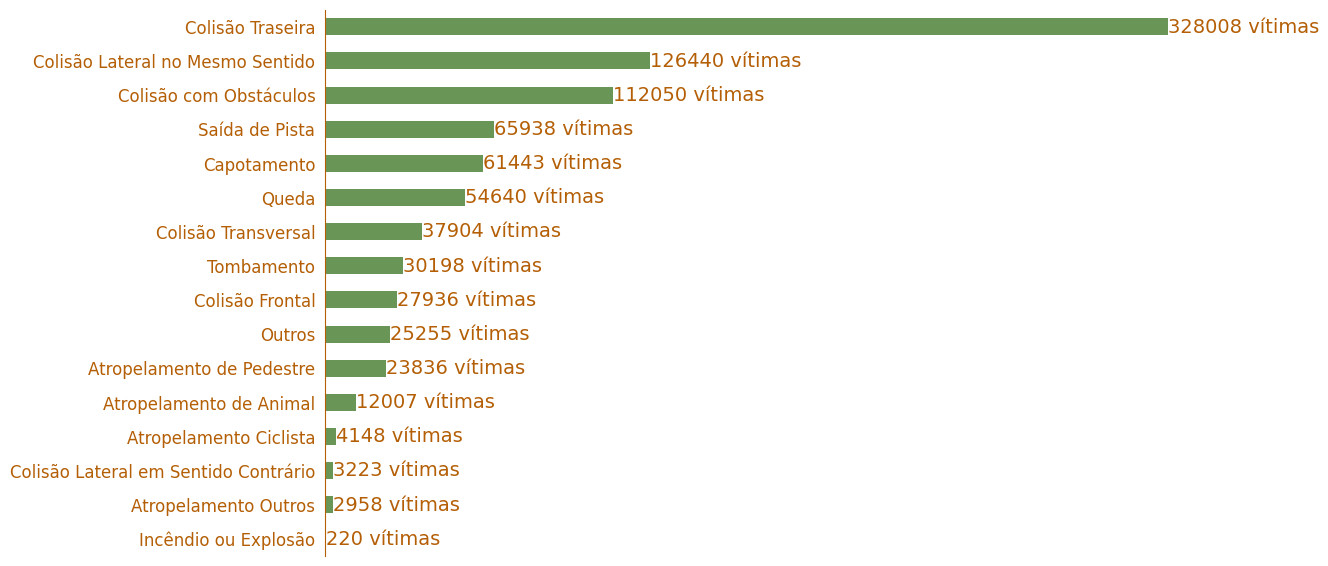

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupe os dados por tipo de acidente e some as vítimas
total_vitimas_por_tipo = df.groupby('Tipo de Acidente')['Total de Vítimas'].sum()

# Ordene os tipos de acidentes em ordem decrescente
total_vitimas_por_tipo = total_vitimas_por_tipo.sort_values(ascending=True)  # Altere para ordem decrescente

# Crie um gráfico de barras na horizontal para visualizar o total de vítimas por tipo de acidente
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da figura
ax = total_vitimas_por_tipo.plot(kind='barh', color='#699657')  # Altere a cor das barras


plt.tight_layout()

# Adicione os valores à direita de cada barra com tamanho de fonte e cor personalizados
for i, total in enumerate(total_vitimas_por_tipo):
    ax.text(total + 10, i, f'{total} vítimas', ha='left', va='center', fontsize=14, color='#b45f06')  # Altere o tamanho da fonte e a cor

plt.tick_params(left=False, bottom=False)
sns.despine(left=False, right=True, top=True, bottom=True)
plt.gca().spines['left'].set_color('#b45f06')
plt.tick_params(colors='#b45f06')
plt.xticks([])  # Remova os rótulos no eixo x
plt.ylabel('')
plt.yticks(fontsize=12)
# Exiba o gráfico
plt.show()


In [ ]:
#Qual o tipo de acidente mais comum?

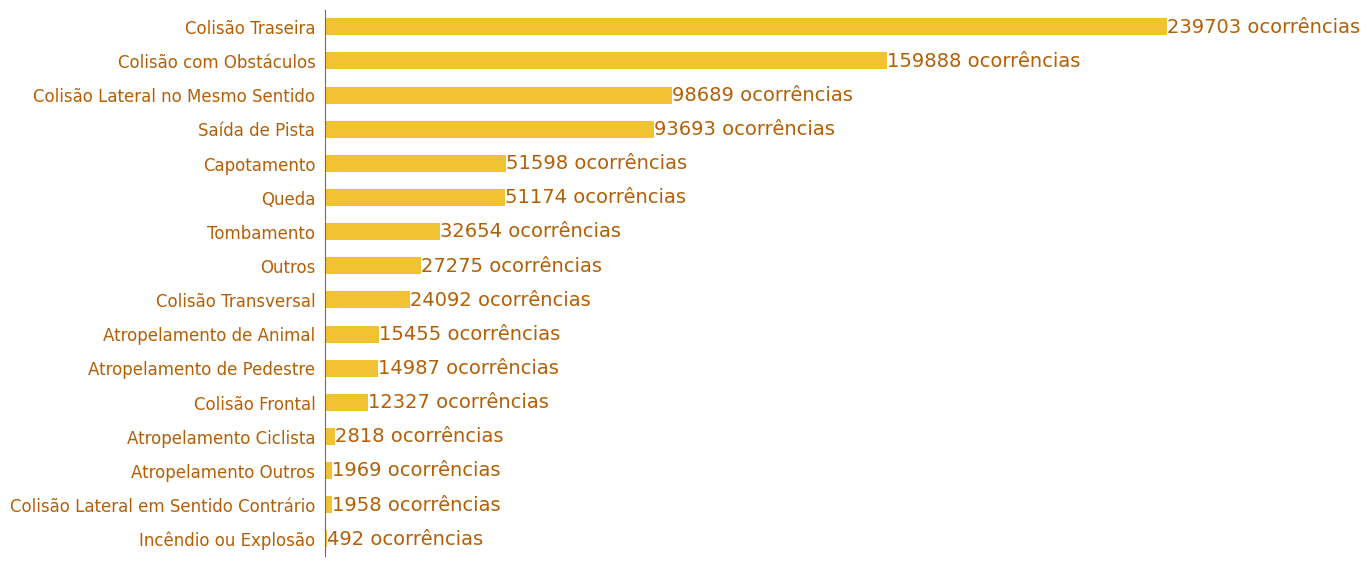

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conte o número de ocorrências de cada tipo de acidente
contagem_tipos_acidentes = df['Tipo de Acidente'].value_counts()

# Ordene os tipos de acidentes em ordem decrescente
contagem_tipos_acidentes = contagem_tipos_acidentes.sort_values(ascending=True)  # Altere para ordem decrescente

# Crie um gráfico de barras horizontais para mostrar os tipos de acidentes
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da figura
ax = contagem_tipos_acidentes.plot(kind='barh', color='#f1c232')  # Altere a cor das barras


plt.tight_layout()

# Adicione os valores à direita de cada barra com tamanho de fonte e cor personalizados
for i, total in enumerate(contagem_tipos_acidentes):
    ax.text(total + 10, i, f'{total} ocorrências', ha='left', va='center', fontsize=14, color='#b45f06')  # Altere o tamanho da fonte e a cor

plt.tick_params(left=False, bottom=False)
sns.despine(left=False, right=True, top=True, bottom=True)
plt.gca().spines['left'].set_color('#b45f06')
plt.tick_params(colors='#b45f06')
plt.xticks([])  # Remova os rótulos no eixo x
plt.ylabel('')
plt.yticks(fontsize=12)

# Exiba o gráfico
plt.show()


1-Tempo

* Quantidade de acidentes ao longo dos anos.
* Quantidade de acidentes ao longo do dia.
* Quantidade de acidentes ao longo do ano.
* Houve uma diminuição nos acidentes durante o período da pandemia?


2-Segurança
* Qual concessionária tem mais concessões de trechos?
* Os trechos com mais acidentes?
* Os trechos com menos acidentes?
* Em qual estado ocorre mais acidentes?
* Qual o sentido em que ocorreram mais acidentes?
* Qual o Km mais perigoso?

3-Véiculos
* Qual o véiculo mais envolvido em acidentes?
* Quantidade de vítimas por tipo de acidente?
* Qual o tipo de acidente mais comum?


In [ ]:
df.columns

Index(['Horário', 'Data', 'Concessionária da Rodovia', 'Trecho', 'Sentido',
       'Km', 'Tipo de Acidente', 'Automovel', 'Bicicleta', 'Caminhao', 'Moto',
       'Onibus', 'Outros', 'Tracao Animal', 'Transporte de Cargas Especiais',
       'Trator Maquinas', 'Utilitarios', 'Tipo de Ocorrencia', 'Ilesos',
       'Levemente Feridos', 'Moderadamente Feridos', 'Gravemente Feridos',
       'Mortos', 'Ano', 'Total de Acidentes por Ano', 'Hora', 'Mês',
       'Total de Acidentes por Mês', 'Total de Vítimas', 'Total de Feridos',
       'BRs', 'Siglas', 'Faixa de Km'],
      dtype='object')

In [ ]:
df.to_csv('Acidentes(2010-2022).csv', index= False)